#Music Genre Classification

##1. Introduction
- **Objective**: Classify music tracks into genres such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood.
- **Scope**: Use machine learning techniques to analyze and classify music tracks based on audio features.
- **Goals**: Achieve high classification accuracy and F1 score.


## 2. Dataset Overview

### 2.1 Load Dataset

In [86]:
import pandas as pd
import numpy as np
import difflib #find closests string matches
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline


In [28]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'music-genre-classification-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F83334%2F9222329%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T233113Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1a17d33f708054dade0245a61b0508465f14b0789085c9e91cd7371b82dfccd58a858feb4ac7fc48156c5d65c1c7762474eb5c7aed1400534ad08ab6e1673ad539139cfe81b66c0f42d978f2083fae72e9a59b9f0c0dabe97c44acf5c76e4c4563eb22ea417b177101a09e5ddad5276b13030746a39cf6db1f1d23741e7981ef0119b25a795554039056af214beb5032086ba209be0b75f595596d5906b2c2fdd2792e5db4691c0e21968880e53053b80e28e49db5032cff6562ca66b1caacaf8e6a91450d7f920953ec690b0cf62e384147c9819438f8cf8b1c16419dee4ac646de61c41b019f24a7688c53efa6d7ccbd085254f48b173bb76786e16f748458'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1004886 bytes downloaded
Downloaded and uncompressed: music-genre-classification-2024
Data source import complete.


In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-genre-classification-2024/sample_submission (2).csv
/kaggle/input/music-genre-classification-2024/train (1).csv
/kaggle/input/music-genre-classification-2024/test (2).csv


In [108]:
train_df = pd.read_csv("/kaggle/input/music-genre-classification-2024/train (1).csv")
test_df = pd.read_csv("/kaggle/input/music-genre-classification-2024/test (2).csv")
sample_submission_df = pd.read_csv("/kaggle/input/music-genre-classification-2024/sample_submission (2).csv")


### 2.2 Explore Dataset

Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [33]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The dataset has 14396 rows and 18 columns.


Inspect the first few rows of the training data

In [34]:
print("Training Data")
train_df.head()

Training Data


,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


Check the summary statistics

In [35]:
print("Summary Statistics")
train_df.describe()

Summary Statistics


,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Check the data types

In [36]:
print("Data Types")
print(train_df.dtypes)

Data Types
Id                      int64
Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


Check for missing and duplicated values

In [37]:
print("Missing Values")
print(train_df.isnull().sum())

Missing Values
Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [38]:
train_df.duplicated().sum()

0

Handle Missing Values

In [39]:
train_df['Popularity'].fillna(train_df['Popularity'].mean(), inplace=True)
train_df['key'].fillna(train_df['key'].mean(), inplace=True)
train_df['instrumentalness'].fillna(train_df['instrumentalness'].mean(), inplace=True)

In [40]:
test_df['Popularity'].fillna(test_df['Popularity'].mean(), inplace=True)
test_df['key'].fillna(test_df['key'].mean(), inplace=True)
test_df['instrumentalness'].fillna(test_df['instrumentalness'].mean(), inplace=True)

In [41]:
print(train_df.isnull().sum())

Id                    0
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


### 2.3 Dataset Visualization

Visualize the distribution of the Class

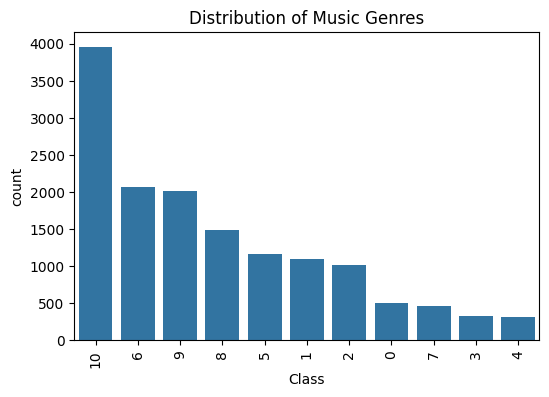

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Class', order=train_df['Class'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Music Genres')
plt.show()

Feature Engineering

In [43]:
numerical_features = ['Popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence']

Correlation Matrix

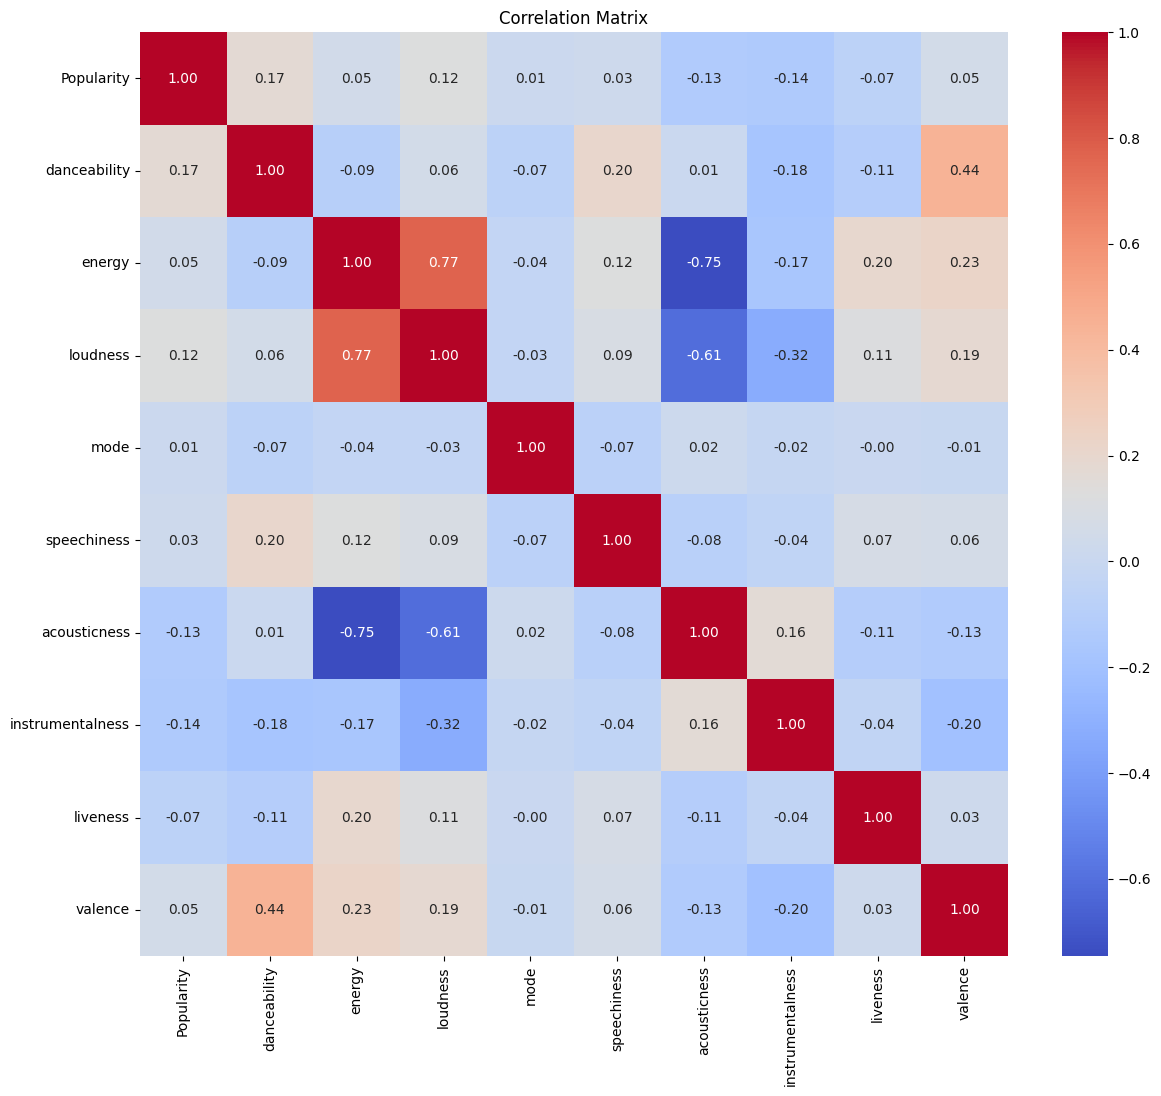

In [44]:
plt.figure(figsize=(14, 12))
correlation_matrix = train_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Visualize distributions of numerical features

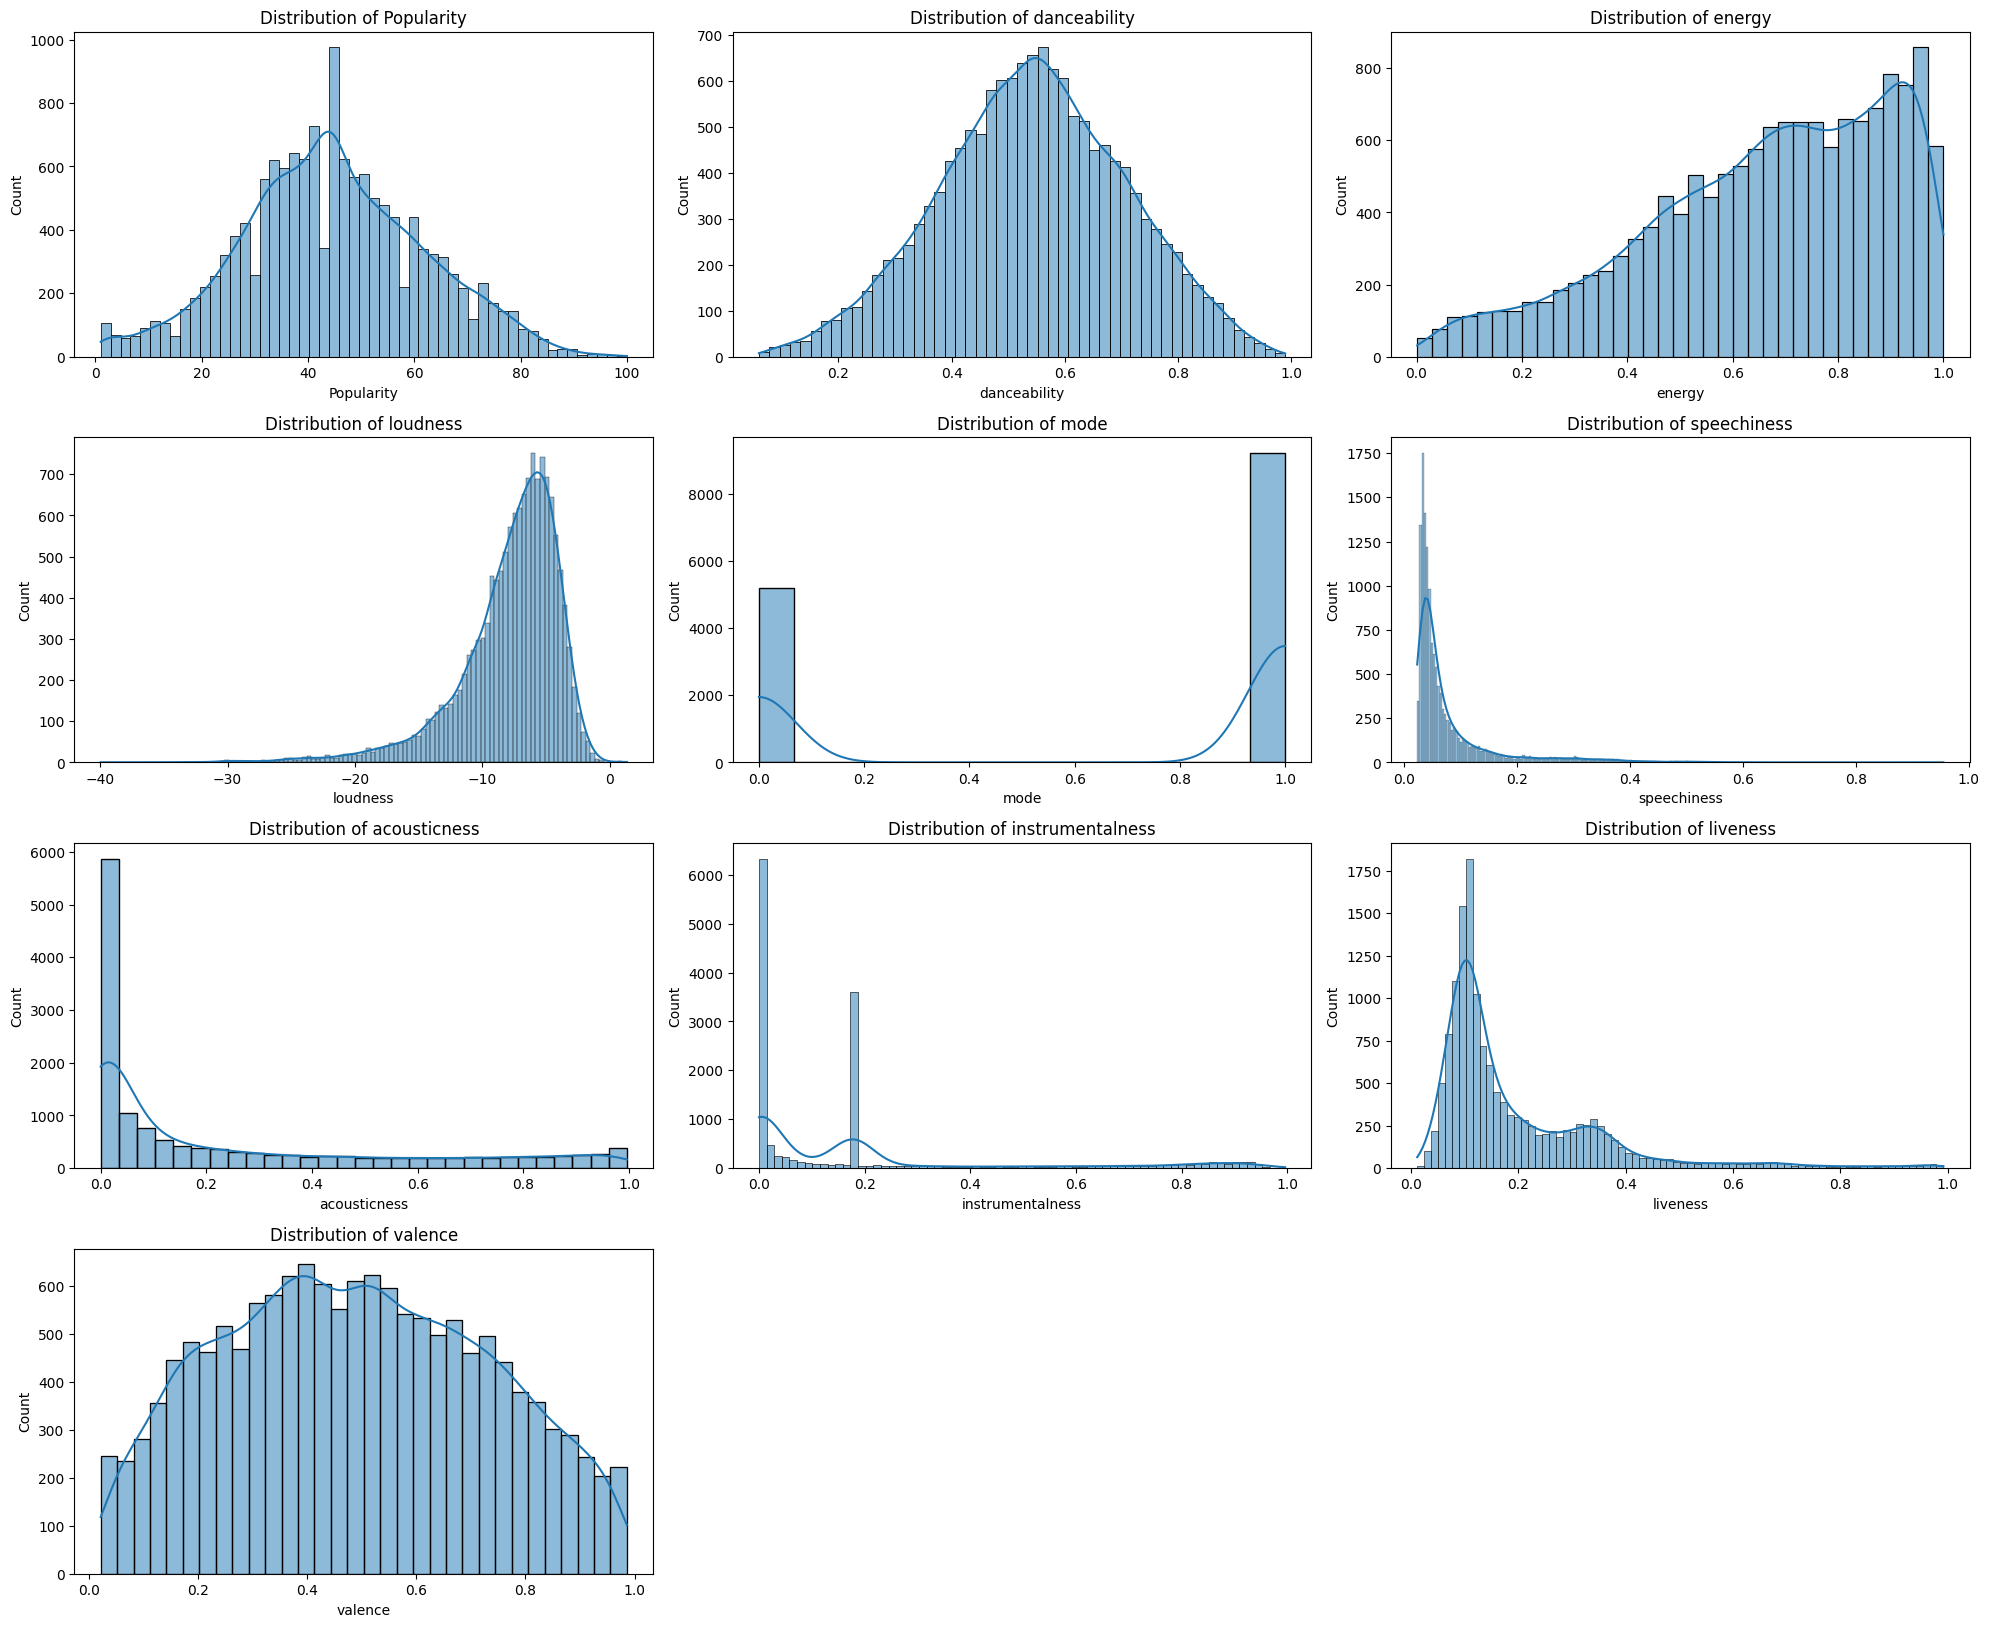

In [45]:
plt.figure(figsize=(20, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Pairplot with the target Class

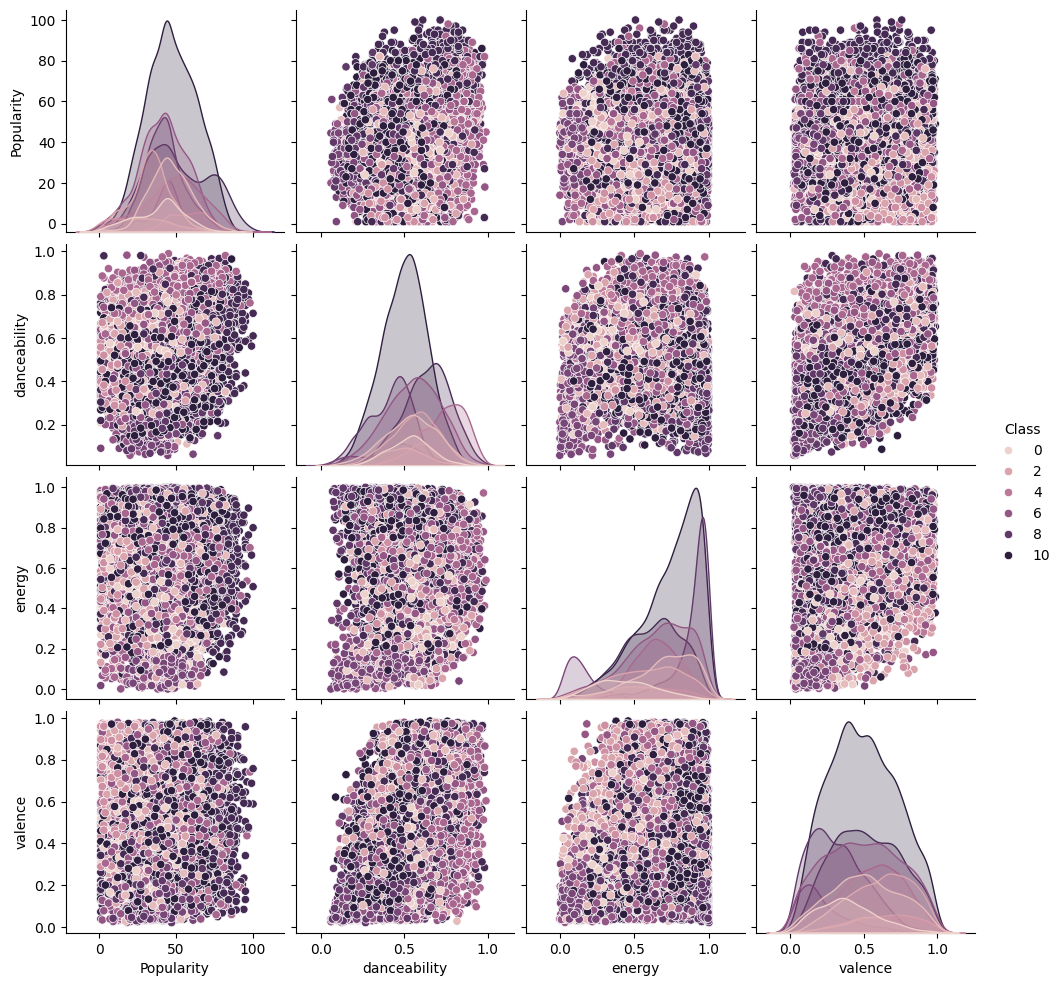

In [46]:
sample_features = ['Popularity', 'danceability', 'energy', 'valence']
sns.pairplot(train_df, vars=sample_features, hue='Class')
plt.show()


Boxplots for feature distribution by class

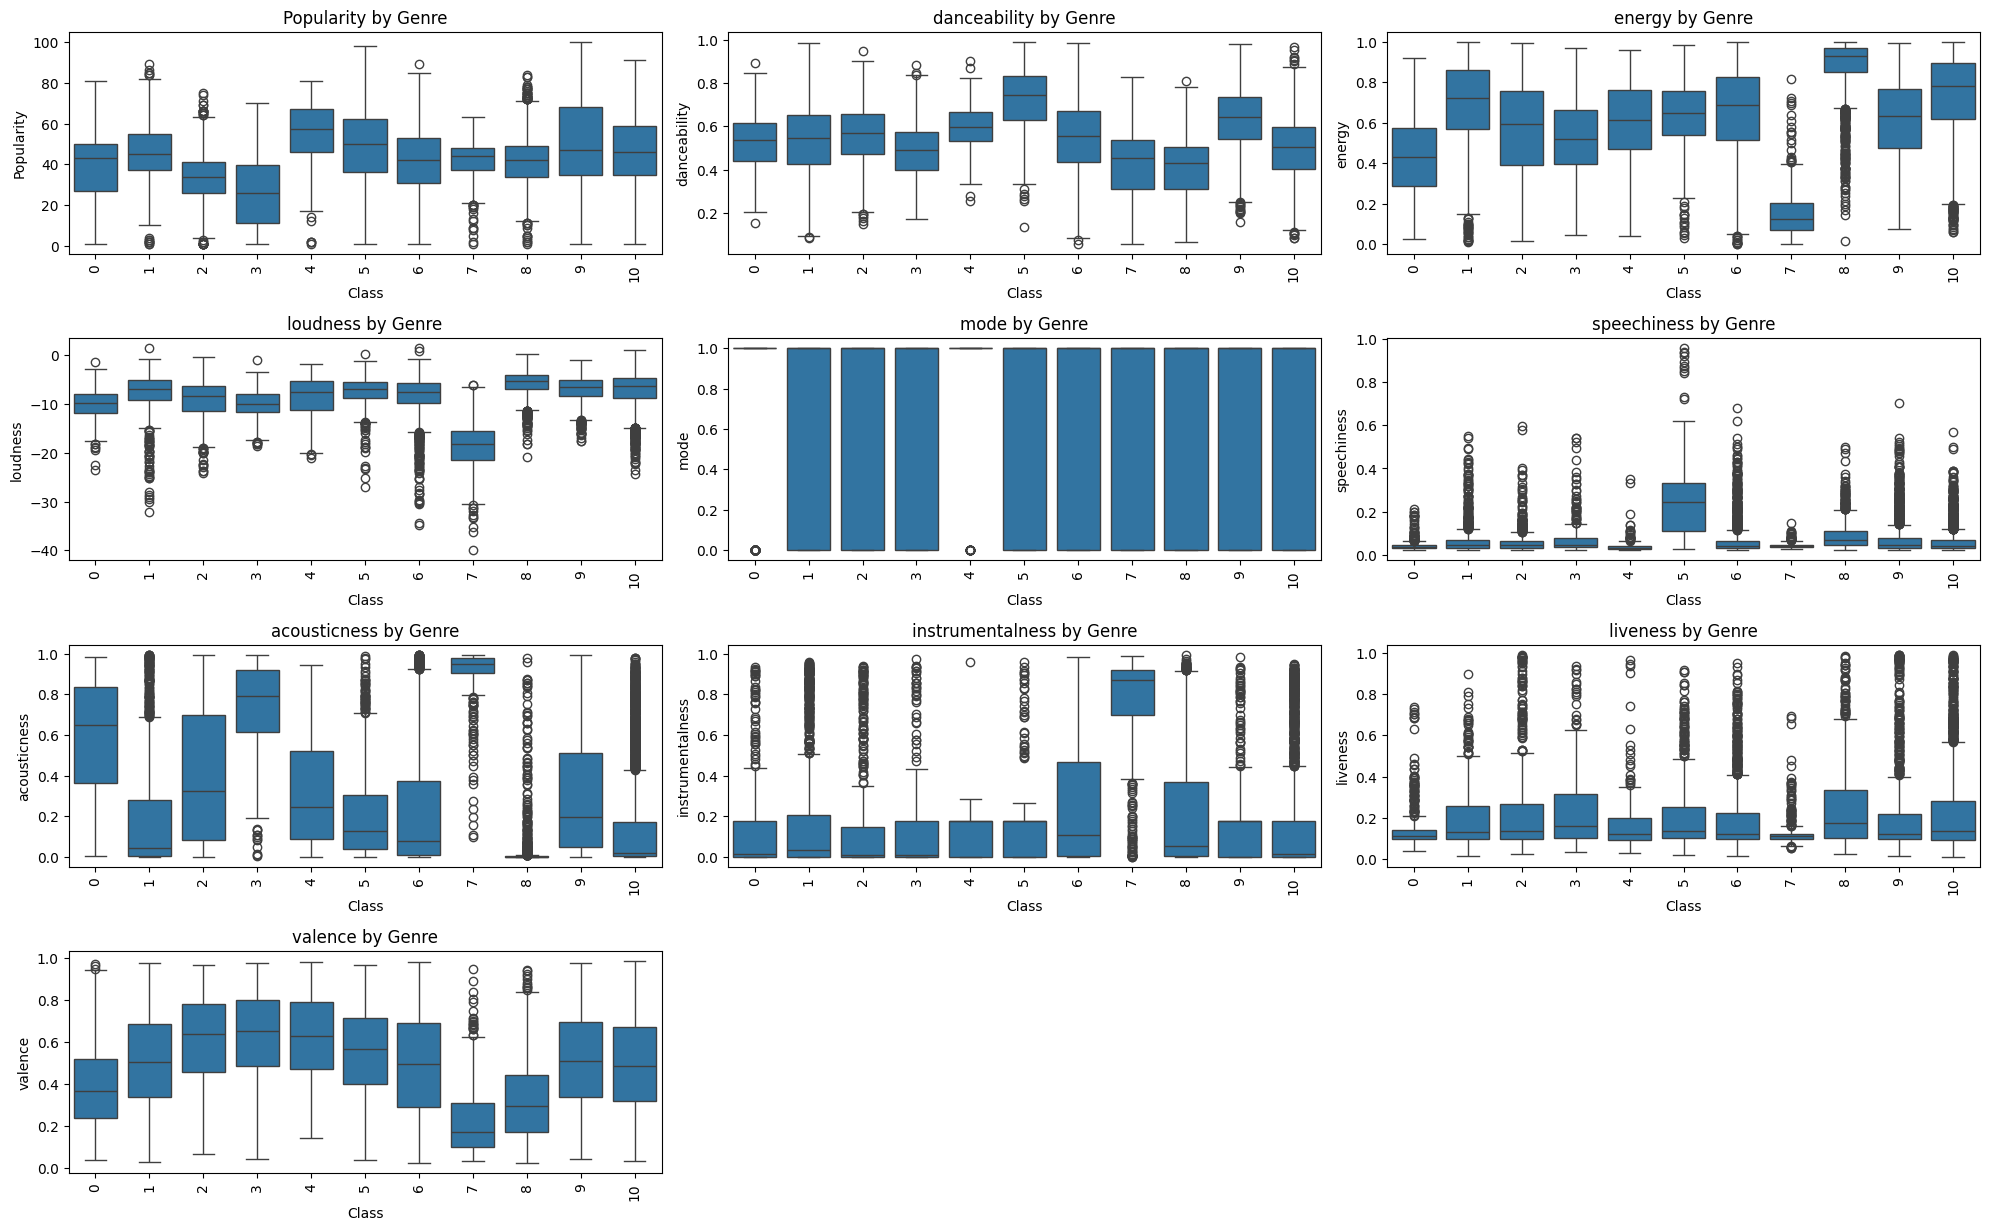

In [47]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Class', y=feature, data=train_df)
    plt.xticks(rotation=90)
    plt.title(f'{feature} by Genre')
plt.tight_layout()
plt.show()


Violin plots for feature distribution by class

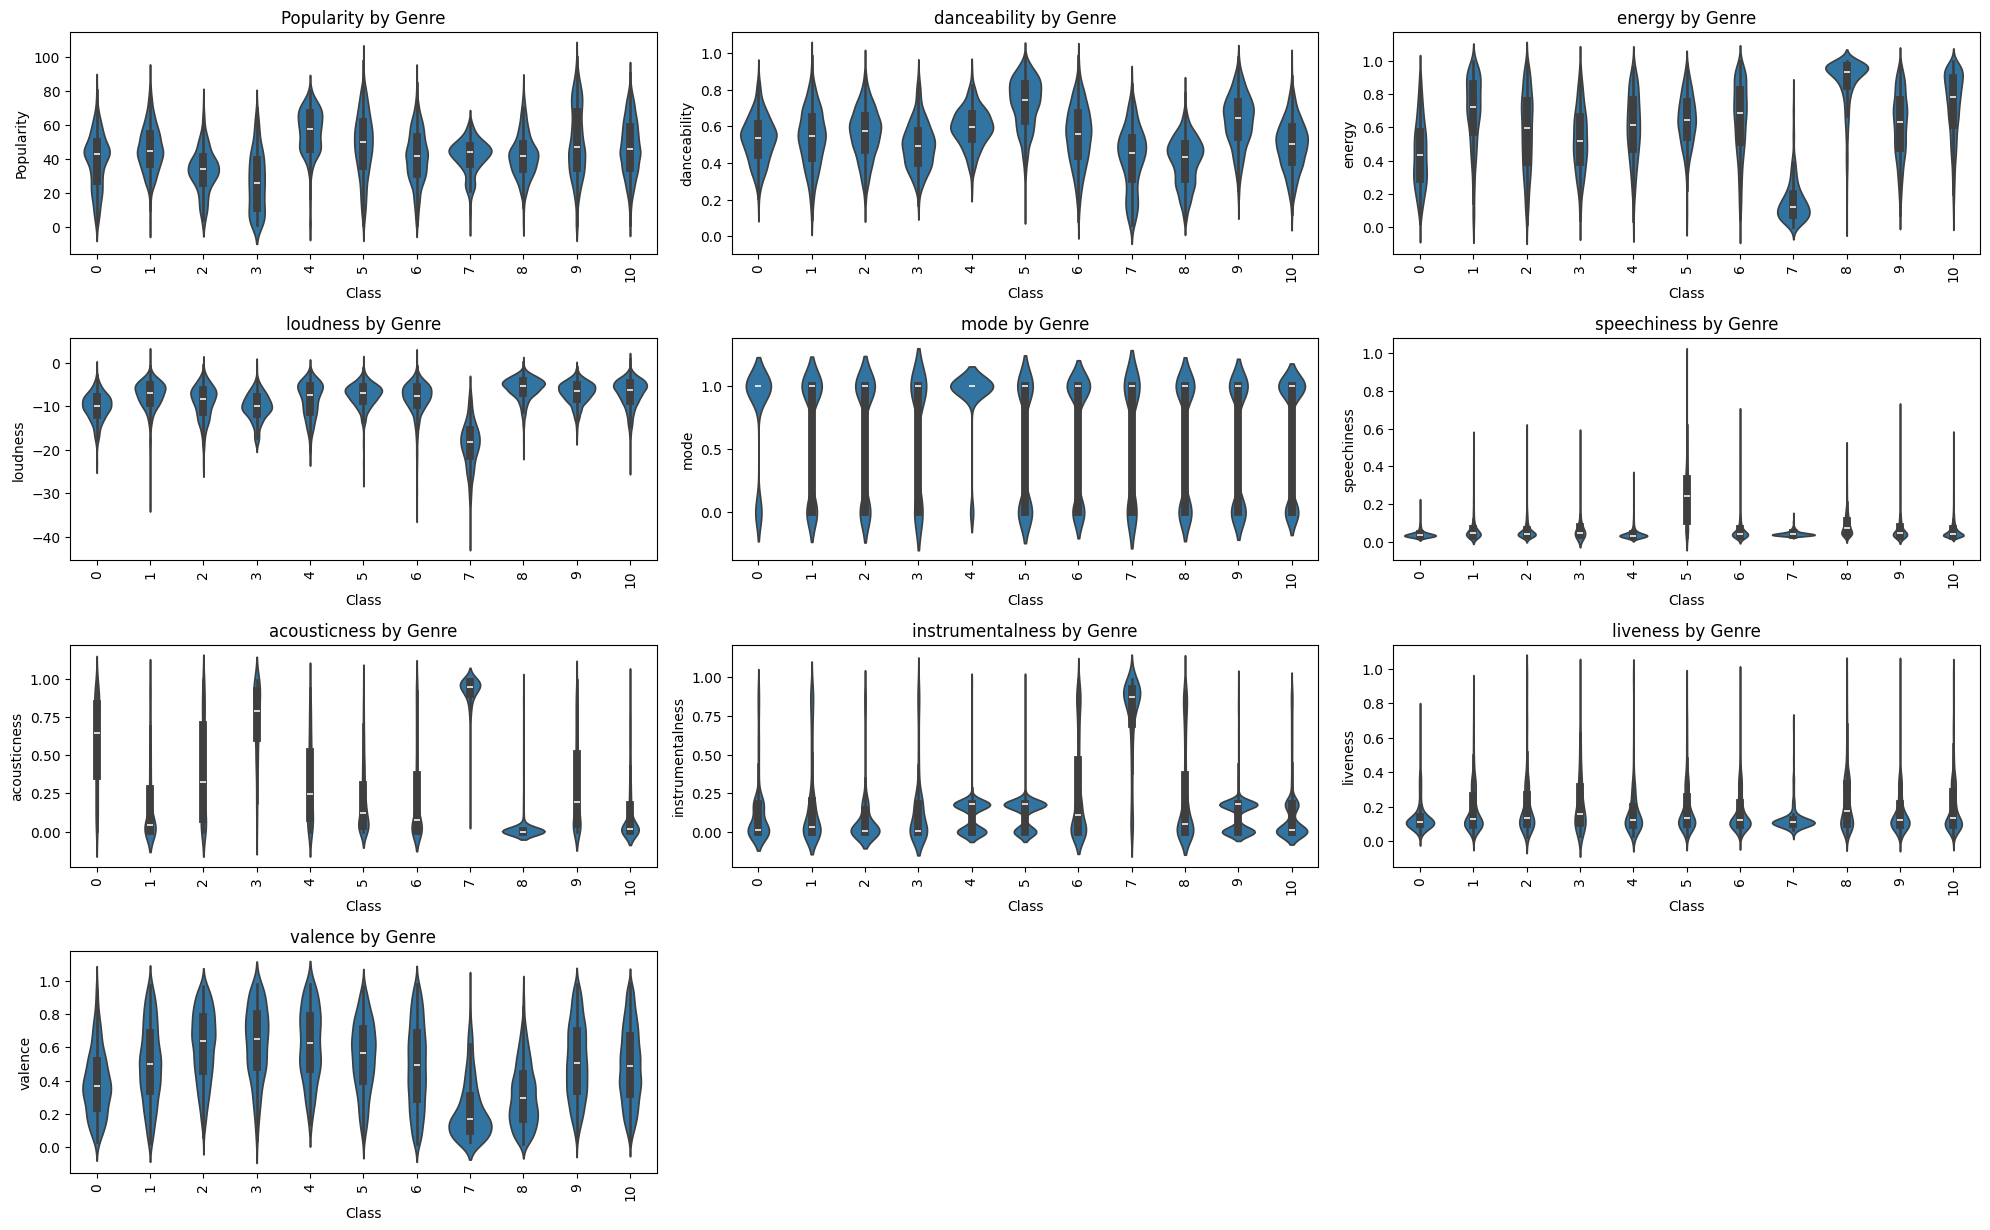

In [48]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 3, i + 1)
    sns.violinplot(x='Class', y=feature, data=train_df)
    plt.xticks(rotation=90)
    plt.title(f'{feature} by Genre')
plt.tight_layout()
plt.show()


## 3. Data Pre-processing

### 3.1 Encode Categorical Variables

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['Class'] = label_encoder.fit_transform(train_df['Class'])

### 3.1 Feature Engineering

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df['loudness'] = scaler.fit_transform(train_df['loudness'].values.reshape(-1, 1))

In [51]:
train_df['danceability_energy'] = train_df['danceability'] * train_df['energy']
test_df['danceability_energy'] = test_df['danceability'] * test_df['energy']

In [52]:
train_df['loudness_valence'] = train_df['loudness'] * train_df['valence']
test_df['loudness_valence'] = test_df['loudness'] * test_df['valence']

In [53]:
train_df['log_duration'] = np.log1p(train_df['duration_in min/ms'])
test_df['log_duration'] = np.log1p(test_df['duration_in min/ms'])

In [54]:
train_df['tempo_bin'] = pd.cut(train_df['tempo'], bins=[0, 90, 120, 150, 200], labels=['slow', 'medium', 'fast', 'very fast'])
test_df['tempo_bin'] = pd.cut(test_df['tempo'], bins=[0, 90, 120, 150, 200], labels=['slow', 'medium', 'fast', 'very fast'])


In [55]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)
tempo_bin_ohe = ohe.fit_transform(train_df[['tempo_bin']])
tempo_bin_ohe_df = pd.DataFrame(tempo_bin_ohe, columns=ohe.get_feature_names_out(['tempo_bin']), index=train_df.index)

train_df = pd.concat([train_df, tempo_bin_ohe_df], axis=1)
train_df = train_df.drop(columns=['tempo_bin'])

tempo_bin_ohe_test = ohe.transform(test_df[['tempo_bin']])
tempo_bin_ohe_test_df = pd.DataFrame(tempo_bin_ohe_test, columns=ohe.get_feature_names_out(['tempo_bin']), index=test_df.index)

test_df = pd.concat([test_df, tempo_bin_ohe_test_df], axis=1)
test_df = test_df.drop(columns=['tempo_bin'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
from sklearn.preprocessing import OneHotEncoder

train_df['key'] = train_df['key'].round().astype(int)
test_df['key'] = test_df['key'].round().astype(int)

ohe_key = OneHotEncoder(drop=None, handle_unknown='ignore', sparse_output=False)
ohe_key.fit(train_df[['key']])

train_encoded = ohe_key.transform(train_df[['key']])
test_encoded = ohe_key.transform(test_df[['key']])

key_columns = ohe_key.get_feature_names_out(['key'])

train_key_df = pd.DataFrame(train_encoded, columns=key_columns, index=train_df.index)
test_key_df = pd.DataFrame(test_encoded, columns=key_columns, index=test_df.index)

train_df = pd.concat([train_df, train_key_df], axis=1)
test_df = pd.concat([test_df, test_key_df], axis=1)

train_df = train_df.drop(columns=['key'])
test_df = test_df.drop(columns=['key'])

In [57]:
train_df = train_df.drop(columns=['duration_in min/ms', 'tempo'])
test_df = test_df.drop(columns=['duration_in min/ms', 'tempo'])

In [58]:
train_df.columns

Index(['Id', 'Artist Name', 'Track Name', 'Popularity', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'time_signature', 'Class',
       'danceability_energy', 'loudness_valence', 'log_duration',
       'tempo_bin_medium', 'tempo_bin_slow', 'tempo_bin_very fast',
       'tempo_bin_nan', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

### 3.2 Feature Scaling

In [59]:
scaler = StandardScaler()

numerical_features = ['Popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'time_signature', 'danceability_energy',
                      'loudness_valence', 'log_duration', 'tempo_bin_medium', 'tempo_bin_slow', 'tempo_bin_very fast'] + list(tempo_bin_ohe_df.columns) + list(train_key_df.columns)


In [60]:
train_key_df.columns

Index(['key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')

In [61]:
from sklearn.preprocessing import StandardScaler

train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

In [62]:
X = train_df.drop(columns=['Class', 'Artist Name', 'Track Name'])
y = train_df['Class']

## 4. Splitting the Data

In [64]:
from sklearn.model_selection import train_test_split

X[numerical_features] = scaler.fit_transform(X[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Split the data
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


## Feature Importance

<Axes: >

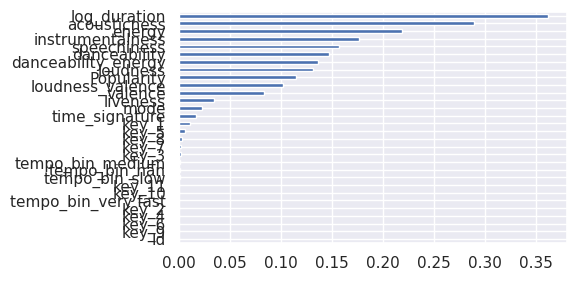

In [65]:
#information gain. mutual info

from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info, X_train.columns).sort_values()

sns.set(rc = {'figure.figsize':(5,3)})
mutual_info.plot(kind='barh')

<Axes: >

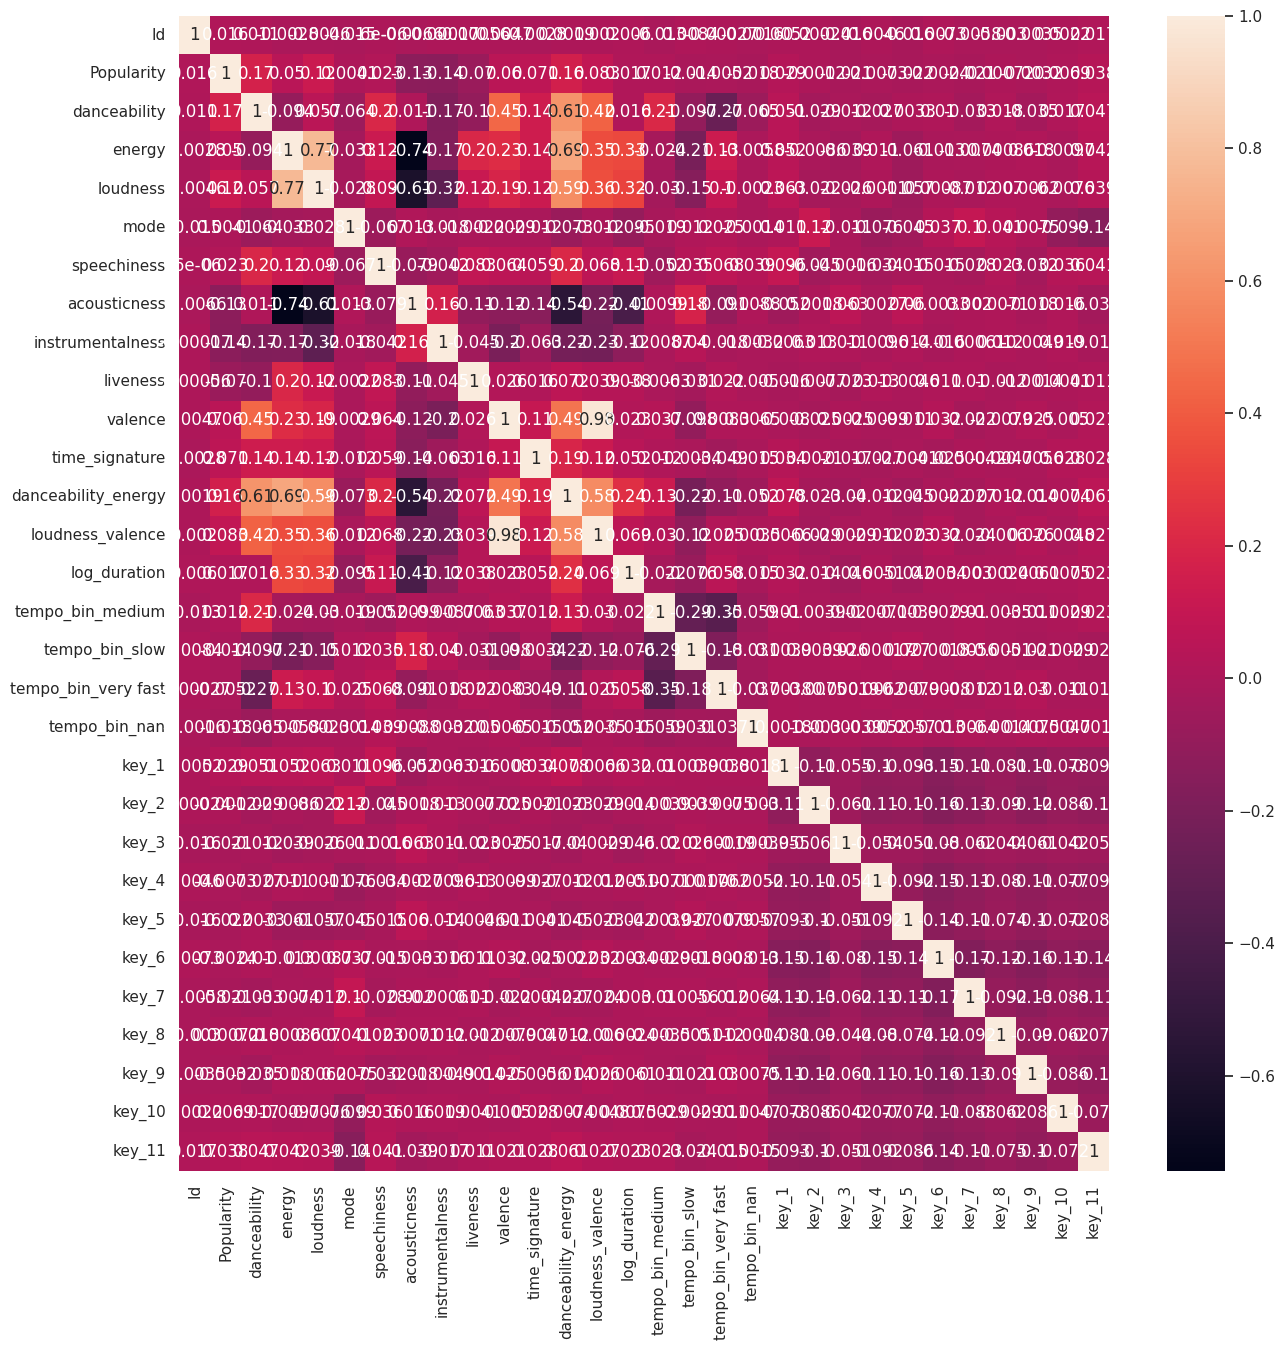

In [66]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(X_train.corr(),annot=True)

In [67]:
correlated_features=[]
for i in range(len(X_train.corr().columns)):
    for j in range(i):
        if abs(X_train.corr().iloc[i, j]) > 0.8:
            print(X_train.corr().columns[i], X_train.corr().columns[j])
            colname = X_train.corr().columns[i]


loudness_valence valence


In [68]:
X_train.drop(columns=['energy'],axis=1, inplace=True)
X_test.drop(columns=['energy'],axis=1, inplace=True)
X_train.drop(columns=['loudness'],axis=1, inplace=True)
X_test.drop(columns=['loudness'],axis=1, inplace=True)

In [69]:
#ML model evalution

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn import metrics



def evalaute(pipeline, y_test_original, y_pred_original, show=True):

    if show:
        print(metrics.classification_report(y_test_original, y_pred_original, digits=3))


        fig, ax = plt.subplots(figsize=(12, 8))
        plt.grid(False)
        cm = confusion_matrix(y_test_original, y_pred_original)
        cmp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test_original))
        cmp.plot(ax=ax)

        plt.show();
    else:
        rep  = metrics.classification_report(y_test_original, y_pred_original, digits=3,  output_dict=True)
        df_rep = pd.DataFrame(rep).transpose()
        return df_rep



In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [73]:
#Build pipeline
pipeline = imbPipeline(steps=[
    ('scale', StandardScaler()),
    ('smote', SMOTE()),
    ('clf', RandomForestClassifier(random_state=42))
    ] )

In [74]:
clfs = []
clfs.append(LogisticRegression(max_iter=200, C=0.5, random_state=42))
clfs.append(SVC(random_state=42))
clfs.append(KNeighborsClassifier(n_neighbors=5))
clfs.append(DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42))
clfs.append(RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5, random_state=42))
clfs.append(GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42))
clfs.append(XGBClassifier(random_state=42))

In [75]:
#%%script false --no-raise-error
for classifier in clfs:
    #set estimator as a seperate parameter
    pipeline.set_params(clf = classifier)

    #fit data
    pipeline.fit(X_train, y_train)

    scores = cross_validate(pipeline, X_train, y_train, cv = 5, return_train_score=True)
    print(str(classifier))
    print("Train accuracy : ", scores['train_score'].mean(), "CV accuracy : ",  scores['test_score'].mean())
    print('-----------------------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression(C=0.5, max_iter=200, random_state=42)
Train accuracy :  0.43476454550171917 CV accuracy :  0.42367036353548515
-----------------------------------
SVC(random_state=42)
Train accuracy :  0.5610888779325444 CV accuracy :  0.4108200505379457
-----------------------------------
KNeighborsClassifier()
Train accuracy :  0.6437348436121644 CV accuracy :  0.30149401294205624
-----------------------------------
DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42)
Train accuracy :  0.41305631392971637 CV accuracy :  0.37833973349978295
-----------------------------------
RandomForestClassifier(max_depth=7, min_samples_split=5, random_state=42)
Train accuracy :  0.464332279535341 CV accuracy :  0.41950117147923
-----------------------------------
GradientBoostingClassifier(learning_rate=0.05, random_state=42)
Train accuracy :  0.5316081874528427 CV accuracy :  0.4684777856177932
-----------------------------------
XGBClassifier(base_score=None, booster=None

In [76]:
#%%script false --no-raise-error

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
        ('smote', SMOTE()),
        ('xgb', XGBClassifier())
    ])

In [77]:
#%%script false --no-raise-error

params = {
    'xgb__learning_rate': [0.1, 0.01],
    'xgb__max_depth': [3,5,7],
    'xgb__reg_lambda': [1,1.5,2],
    'xgb__gamma': [1, 2],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=params, scoring="f1_macro", n_jobs=1, cv=3, error_score="raise", verbose=2)


grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1; total time=   5.2s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1; total time=   7.9s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1; total time=   4.9s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1.5; total time=   7.7s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1.5; total time=   5.1s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=1.5; total time=   7.8s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=2; total time=   4.6s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=2; total time=   4.1s
[CV] END xgb__gamma=1, xgb__learning_rate=0.1, xgb__max_depth=3, xgb__reg_lambda=2; total time=   7.7s
[CV] 

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importan...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=1,
             param_grid={'xgb__gamma': [1, 2],
                         'xgb__learning_rate': [0.1, 0.01],
                         'xgb__max_depth': [3, 5, 7],
                         'xgb__reg_lambda': [1, 1.5, 2]},
             scoring='f1_macro', verbose=2)

In [81]:
#%%script false --no-raise-error

print(grid_search.best_estimator_)


Pipeline(steps=[('smote', SMOTE()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                    

In [82]:
grid_search.best_score_
#0.3702364106990926

0.5525515063731979

              precision    recall  f1-score   support

           0      0.638     0.705     0.670        95
           1      0.174     0.055     0.084       218
           2      0.423     0.566     0.484       189
           3      0.680     0.729     0.703        70
           4      0.562     0.820     0.667        61
           5      0.664     0.743     0.701       245
           6      0.443     0.282     0.345       397
           7      0.944     0.894     0.918        94
           8      0.537     0.612     0.572       294
           9      0.507     0.517     0.512       418
          10      0.491     0.561     0.524       799

    accuracy                          0.524      2880
   macro avg      0.551     0.589     0.562      2880
weighted avg      0.503     0.524     0.507      2880



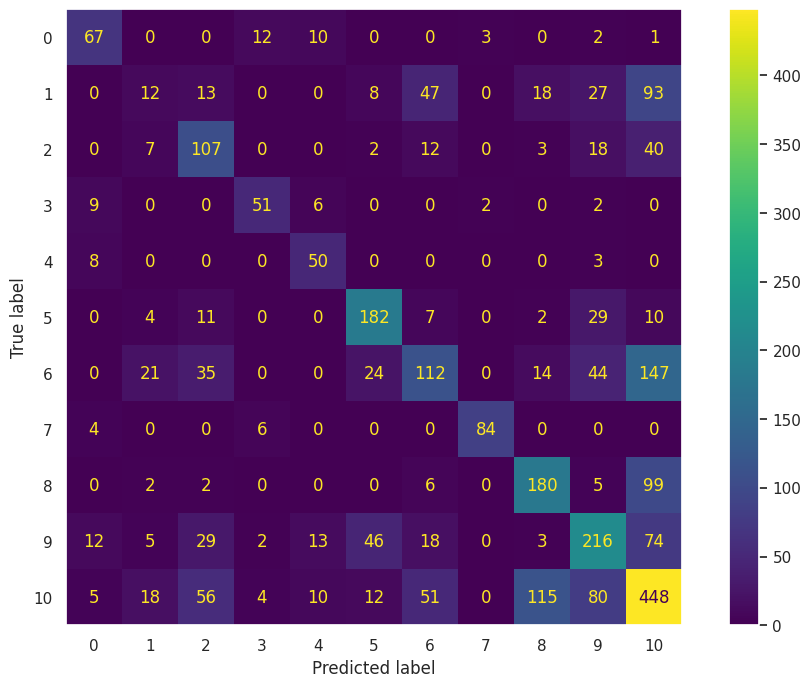

In [87]:
#%%script false --no-raise-error
le = LabelEncoder().fit(y)

#predict
y_pred = grid_search.best_estimator_.predict(X_test)

#convert target variable to its original categorical form
y_pred_original = le.inverse_transform(y_pred)
y_test_original = le.inverse_transform(y_test)

evalaute(grid_search, y_test_original, y_pred_original)

In [88]:
#check for null values
test_df.isna().sum()

,0
Id,0
Artist Name,0
Track Name,0
Popularity,0
danceability,0
energy,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [89]:
test_df.isna().sum()

,0
Id,0
Artist Name,0
Track Name,0
Popularity,0
danceability,0
energy,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [98]:
test_df.columns


Index(['Popularity', 'danceability', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'time_signature',
       'danceability_energy', 'loudness_valence', 'log_duration',
       'tempo_bin_medium', 'tempo_bin_slow', 'tempo_bin_very fast',
       'tempo_bin_nan', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6',
       'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

In [99]:
X_train.columns

Index(['Id', 'Popularity', 'danceability', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'danceability_energy', 'loudness_valence',
       'log_duration', 'tempo_bin_medium', 'tempo_bin_slow',
       'tempo_bin_very fast', 'tempo_bin_nan', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11'],
      dtype='object')

In [104]:
   print(f"Length of test_df: {len(test_df)}")
   print(f"Length of final_predictions: {len(final_predictions)}")
y = test_df['Id']

Length of test_df: 3600
Length of final_predictions: 3600


In [105]:
test_df = pd.read_csv("/kaggle/input/music-genre-classification-2024/test (2).csv")

features_to_keep = ['Id', 'Popularity', 'danceability', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence',
                   'time_signature', 'danceability_energy', 'loudness_valence',
                   'log_duration', 'tempo_bin_medium', 'tempo_bin_slow',
                   'tempo_bin_very fast', 'tempo_bin_nan',
                   'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
                   'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']

test_df = test_df[features_to_keep]
final_predictions = grid_search.best_estimator_.predict(test_df)

sub = pd.DataFrame({'Id': test_df['Id'], 'Price': final_predictions})

sub.to_csv('sub.csv', index=False)
sub.shape

(3600, 2)